# Experiments on NME

Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
import collections
import math
import copy
sys.path.insert(0, '../ReSurfEMG')
import helper_functions as hf
from config import Config


In [2]:
# get new changes in our library i.e. the tmsisdk
import sys
sys.path.insert(0, '../resurfemg')

from tmsisdk_lite import Poly5Reader

# Set a collection place for experiments

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [3]:
y_axis = widgets.Dropdown(
    options=["Samples", "Seconds"],
    value='Seconds',
    description="Select View Option",
    disabled=False,
)
display(y_axis)

Dropdown(description='Select View Option', index=1, options=('Samples', 'Seconds'), value='Seconds')

In [4]:
time_view = y_axis.value
time_view

'Seconds'

<a id='#patient_select'>Input patient file path</a>

In [5]:
''''
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')

SyntaxError: EOF while scanning triple-quoted string literal (4143565301.py, line 3)

Now you can pick a file from the list, which have been numbered.

In [ ]:
''''
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)
list_of_numbers_strung = []

for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

In [ ]:
''''
number_chosen = int(btn.value)
emg_file_chosen = emg_files[number_chosen]
draeger_file_chosen = draeger_files[number_chosen]
print("The files you chose are:\n", emg_file_chosen, '\n', draeger_file_chosen)

In [ ]:
''''
# get the poly5 reading
data_emg = Poly5Reader(emg_file_chosen)
data_draeger = Poly5Reader(draeger_file_chosen)
data_emg_samples = data_emg.samples[:data_emg.num_samples]
emg_sample_rate = data_emg.sample_rate
data_draeger_samples = data_draeger.samples[:data_draeger.num_samples]
draeger_sample_rate = data_draeger.sample_rate


In [9]:
emg_sample_rate = 999
from scipy.io import loadmat
mat = loadmat('LD.mat')
data_emg_samples = mat['y1']
data_emg_samples[0]

array([ 26.53998627,  25.41271077,  23.75075914, ...,  -9.51946288,
       -13.29338521, -15.03553826])

In [7]:
''''
emg_sample_rate = 999
from scipy.io import loadmat
mat = loadmat('y.mat')
data_emg_samples = [mat['x1'][0], mat['x2'][0]]
data_emg_samples[0]

SyntaxError: EOF while scanning triple-quoted string literal (3742138837.py, line 6)

In [8]:
data_emg_samples = np.array(data_emg_samples)

NameError: name 'np' is not defined

[Text(0.5, 1.0, 'leads in EMG in sec')]

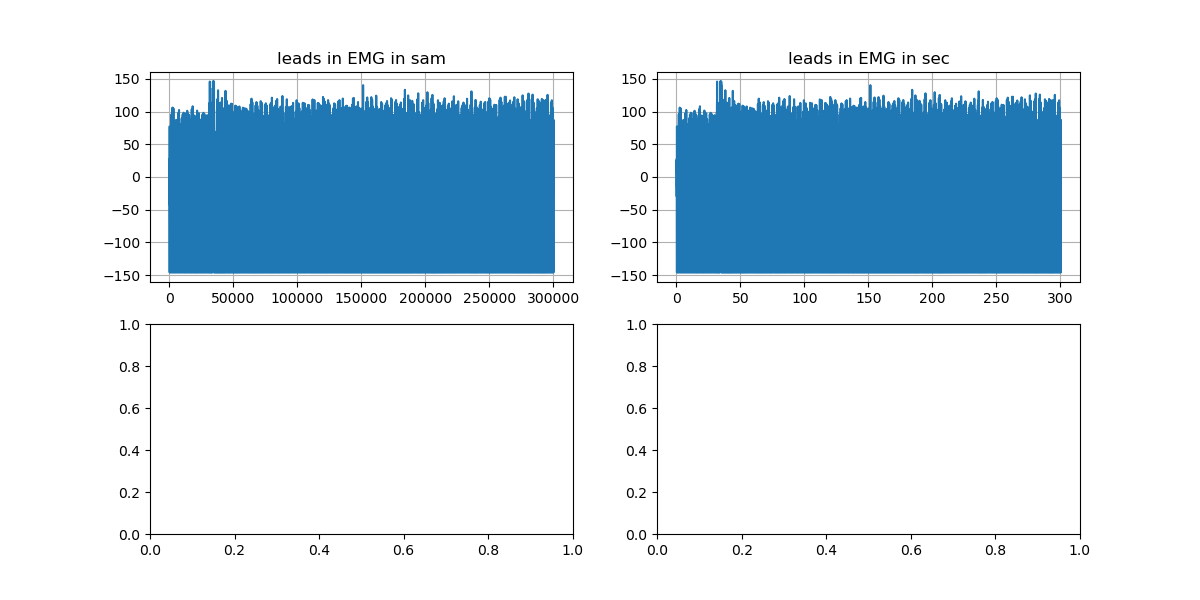

In [12]:
x_emg = copy.deepcopy(data_emg_samples)

y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples[0]))]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x_emg[0])
axis[0, 0].set(title='leads in EMG in sam')
#axis[1, 0].plot(x_emg[1])

axis[0, 1].grid(True)
axis[0, 1].plot(y_emg, x_emg[0])
axis[0, 1].set(title='leads in EMG in sec')
#axis[1, 1].plot(y_emg, x_emg[1])

In [31]:
fs = 1001

In [35]:
# type in start number and press return for it to update
start = input()

In [36]:
# type in end number and press return for it to update
end = input()

[Text(0.5, 1.0, 'leads in EMG')]

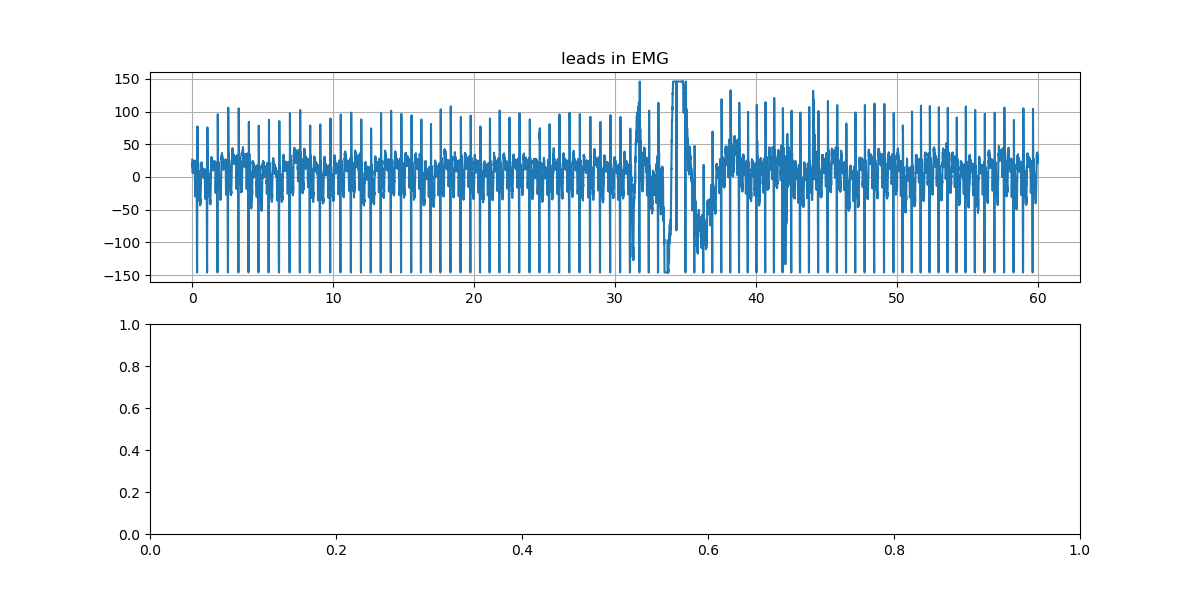

In [37]:
if time_view == 'Seconds':
    start_s = int(float(start)* emg_sample_rate)
    end_s = min([int(float(end)*emg_sample_rate), len(data_emg_samples[0])-1])

else:
    start_s = int(float(start))
    end_s = min([int(float(end)), len(data_emg_samples[0])-1])
    y_emg = [range(len(data_emg_samples[0]))]

# nox examine at a certain scale- from point a to b as samples
fig, axis = plt.subplots(nrows=2, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[int(start_s):int(end_s)], x_emg[0][int(start_s):int(end_s)])
axis[0].set(title='leads in EMG')
#axis[1].plot(y_emg[int(start_s):int(end_s)], x_emg[1][int(start_s):int(end_s)])


Happy with your selection? If not redo, then we can see how the filter works on it.

# Pre-processing pipeline

In [47]:
# processed_data_emg_di = working_pipeline_pre_entropy(data_emg_samples)
bd_filtered_file_data = hf.emg_bandpass_butter_sample(data_emg_samples, 1, 450, fs, output='sos')
processed_data_ecg = bd_filtered_file_data[0, start_s:end_s]
processed_data_emg_di = bd_filtered_file_data[0, start_s:end_s]

y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples[0]))]

y_emg = y_emg[start_s:end_s]


39.30160185331252

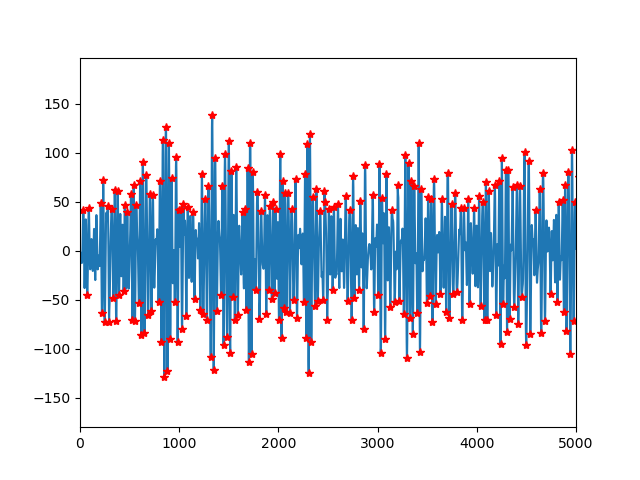

In [12]:
''''
plot_window = 5

# Detect ECG peaks on 1Hz high-pass filtered signals
peak_width = 0.001
peak_fraction = 0.4
ecg = processed_data_ecg
ecg_rms = hf.full_rolling_rms(ecg, 20)
peak_height = peak_fraction*(max(ecg_rms[0:int(plot_window*emg_sample_rate)]) - min(ecg_rms[0:int(plot_window*emg_sample_rate)]))
#peak_height = peak_fraction * max(abs(ecg_rms[0:10000])) - (min(abs(ecg_rms[0:10000])))
ECG_peaks, properties  = scipy.signal.find_peaks(abs(ecg), height=peak_height, width=peak_width*emg_sample_rate)
#ECG_peaks = ECG_peaks - 5



plt.figure()
plt.plot(ecg)
plt.plot(ECG_peaks,ecg[ECG_peaks], 'r*')
plt.xlim([0, 5000])
peak_height

In [58]:
plot_window = 5

# Detect ECG peaks on 1Hz high-pass filtered signals
peak_width = 0.001
peak_fraction = 0.50

ecg = processed_data_ecg
ecg_rms = hf.full_rolling_rms(ecg, 10)
peak_height = peak_fraction*(max(ecg_rms[0:int(plot_window*emg_sample_rate)]) - min(ecg_rms[0:int(plot_window*emg_sample_rate)]))

ECG_peaks, properties  = scipy.signal.find_peaks(ecg, height=peak_height, width=peak_width*emg_sample_rate)
#ECG_peaks = ECG_peaks - 5

# Filter EXG signals 20Hz high pass
ECG_h20 = hf.emg_bandpass_butter_sample(ecg, 20, 450, fs, output='sos')
emg_di_h20 = hf.emg_bandpass_butter_sample(processed_data_emg_di, 20, 450, fs, output='sos')

# Gate ECG and EMG signal
gate_width = 0.12
gate_fill_method = 3    # 0: Zeros, 1: Interpolate start-end, 2: Average prior data, 3: Moving average
gate_width_samples = int(gate_width*emg_sample_rate)

ECG_gated = hf.gating(ECG_h20, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)
emg_di_gated = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)

# Example of all methods
emg_di_gated_zero = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=0)
emg_di_gated_interpolate = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=1)
emg_di_gated_prior_ave = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=2)
emg_di_gated_MA = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=3) # Default


In [13]:
''''
# Filter EXG signals 20Hz high pass
ECG_h20 = hf.emg_bandpass_butter_sample(ecg, 20, 450, 999, output='sos')
emg_di_h20 = hf.emg_bandpass_butter_sample(processed_data_emg_di, 20, 450, 999, output='sos')

# Gate ECG and EMG signal
gate_width = 0.05
gate_fill_method = 0    # 0: Zeros, 1: Interpolate start-end, 2: Average prior data, 3: Moving average
gate_width_samples = int(gate_width*emg_sample_rate)

ECG_gated = hf.gating(ecg, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)
ECG_gated = np.array(ECG_gated)
emg_di_gated = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=gate_fill_method)

# Example of all methods
emg_di_gated_zero = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=0)
emg_di_gated_interpolate = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=1)
emg_di_gated_prior_ave = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=2)
emg_di_gated_MA = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=3) # Default

c:\Users\SoleimaniF\Documents\ReSurfEMG\researcher_interface\../ReSurfEMG\helper_functions.py:1105: RuntimeWarning: Mean of empty slice
  src_signal_gated[k] = np.nanmean(


(0.0, 3000.0)

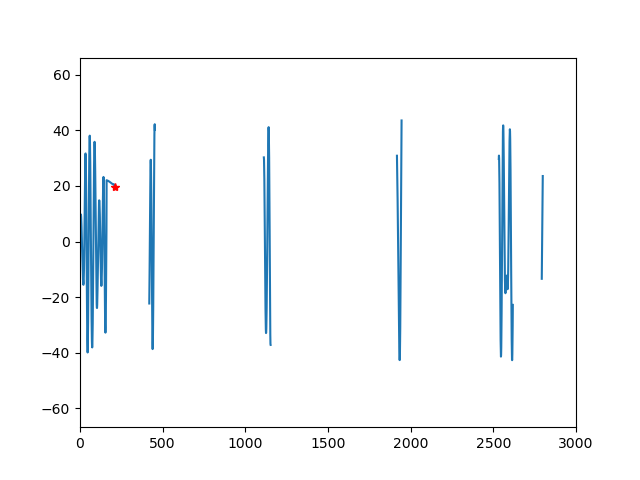

In [22]:
''''
plt.figure()
plt.plot(ECG_gated)
plt.plot(ECG_peaks,ECG_gated[ECG_peaks], 'r*')
plt.xlim([0,3000])

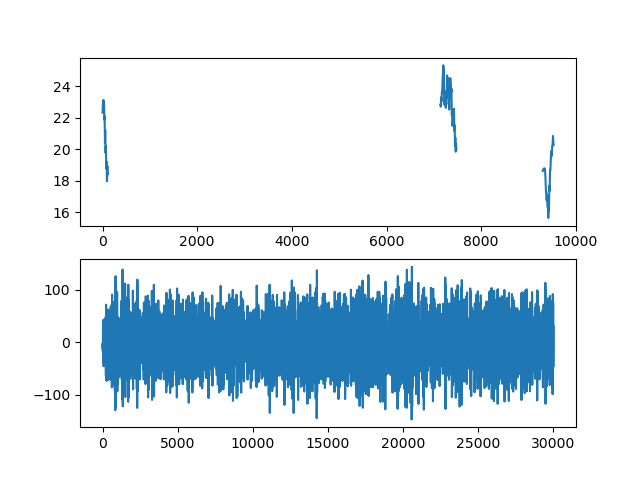

In [23]:
''''
emg_rms=hf.full_rolling_rms(ECG_gated,100)
plt.figure()
plt.subplot(211)
plt.plot(emg_rms[0:30000])
plt.subplot(212)
plt.plot(ecg[0:30000])


Plot gated signal

Text(0.5, 0, 't (s)')

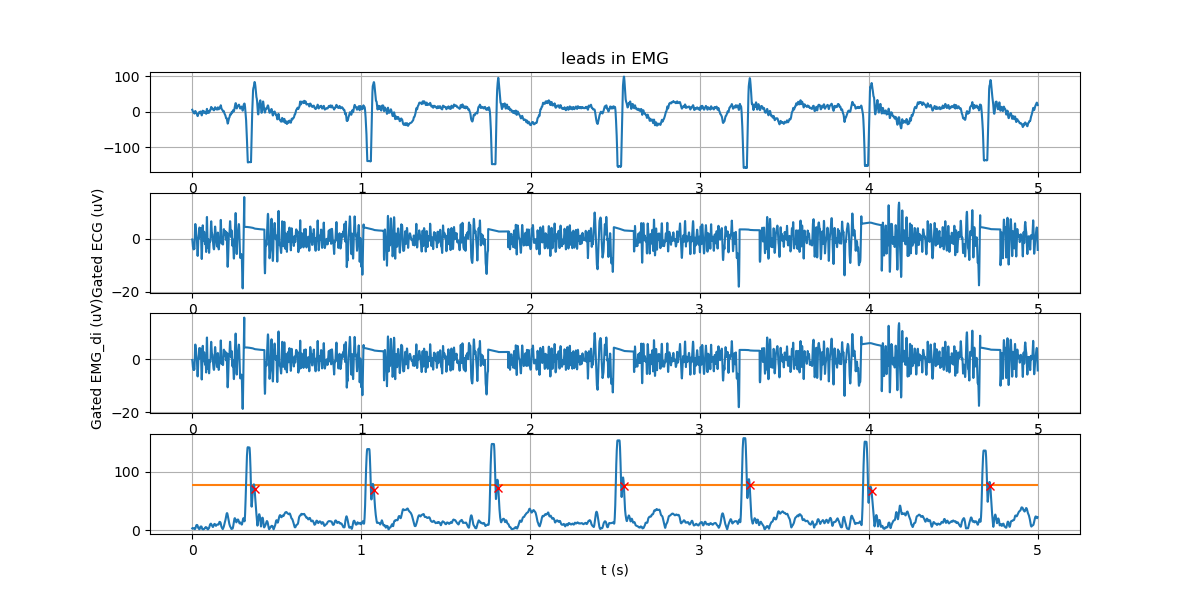

In [59]:

fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[0:int(+plot_window*999)], bd_filtered_file_data[0, int(start_s):int(start_s+plot_window*999)])
axis[1].set_ylabel('Source ECG (uV)')

axis[0].set(title='leads in EMG')
axis[1].grid(True)
axis[1].plot(y_emg[0:int(plot_window*999)], ECG_gated[0:int(plot_window*999)])
axis[1].set_ylabel('Gated ECG (uV)')
# axis[1].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ECG_gated_RMS[int(start_s):int(start_s+plot_window*2048)])
axis[2].grid(True)
axis[2].plot(y_emg[0:int(plot_window*999)], emg_di_gated[0:int(plot_window*999)])
# axis[2].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_gated_RMS[int(start_s):int(start_s+plot_window*2048)])
axis[2].set_ylabel('Gated EMG_di (uV)')

axis[3].grid(True)
axis[3].plot(y_emg[0:int(plot_window*999)], ecg_rms[0:int(plot_window*999)])
axis[3].hlines(y=peak_height, xmin=y_emg[0], xmax=y_emg[int(plot_window*999)], color = "C1")
for idx in range(len(ECG_peaks)):
    if (ECG_peaks[idx] > int(0)) & (ECG_peaks[idx] < int(plot_window*999)):
        axis[3].plot(y_emg[ECG_peaks[idx]], ecg_rms[ECG_peaks[idx]],'rx')

axis[3].set_xlabel('t (s)')

Calculate RMS

In [60]:
RMS_window_ms = 100
RMS_windows_samp = int(RMS_window_ms / 1000 *  emg_sample_rate)

RMS_data_emg_di = hf.full_rolling_rms(emg_di_gated, RMS_windows_samp)

RMS_data_emg_di_zero = hf.full_rolling_rms(emg_di_gated_zero, RMS_windows_samp)
RMS_data_emg_di_interpolate = hf.full_rolling_rms(emg_di_gated_interpolate, RMS_windows_samp)
RMS_data_emg_di_prior_ave = hf.full_rolling_rms(emg_di_gated_prior_ave, RMS_windows_samp)
RMS_data_emg_di_MA = hf.full_rolling_rms(emg_di_gated_MA, RMS_windows_samp)

Plot RMS signals

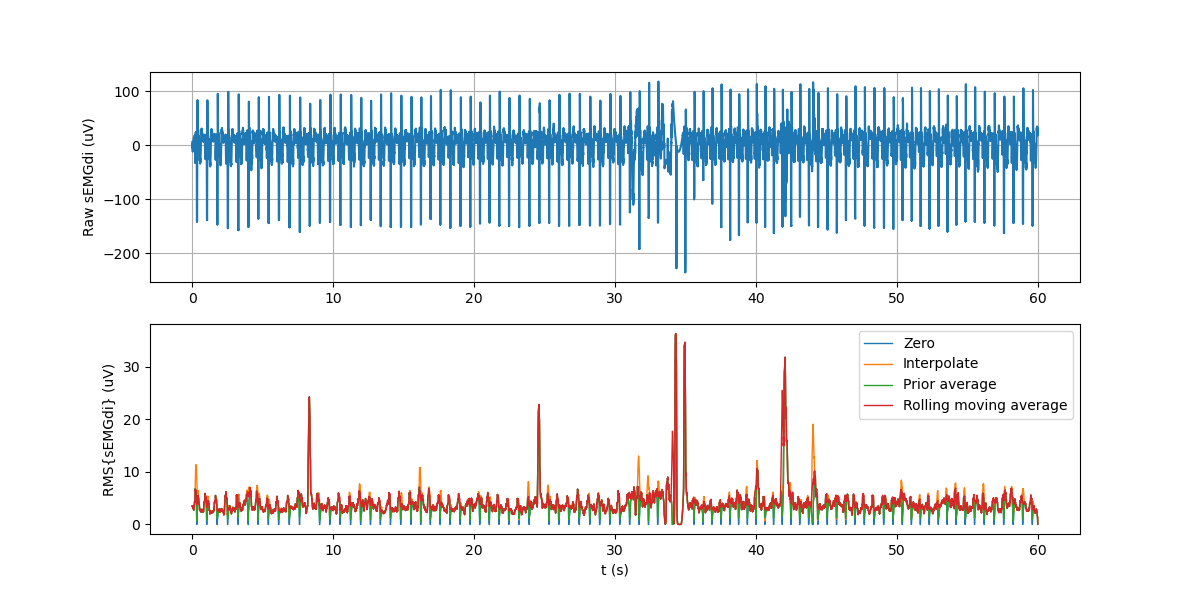

In [61]:

fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg, processed_data_emg_di)
axis[0].set_ylabel('Raw sEMGdi (uV)')

axis[1].plot(y_emg, RMS_data_emg_di_zero, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_interpolate, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_prior_ave, linewidth=1)
axis[1].plot(y_emg, RMS_data_emg_di_MA, linewidth=1)
axis[1].set_xlabel('t (s)')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].legend(['Zero', 'Interpolate', 'Prior average', 'Rolling moving average'])


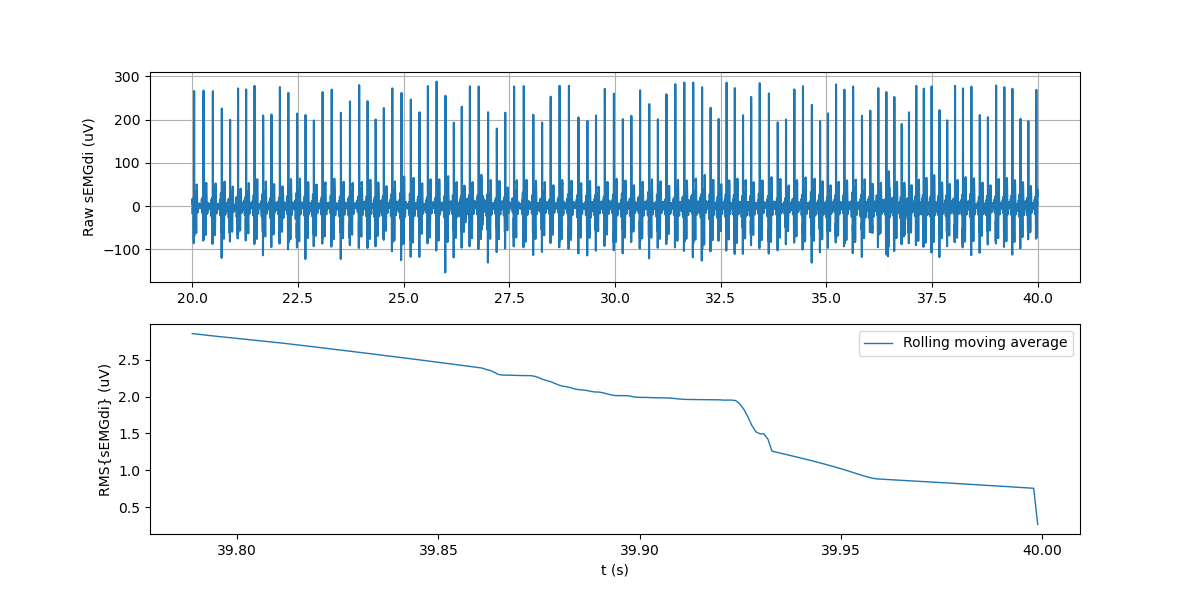

In [73]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg, processed_data_emg_di)
axis[0].set_ylabel('Raw sEMGdi (uV)')
axis[1].plot(y_emg, RMS_data_emg_di_MA, linewidth=1)
axis[1].set_xlabel('t (s)')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].legend([ 'Rolling moving average'])
